# DNA sequence classification using Naive Bayes Classifier

                    KWESIGA KATO STEVEN 2018/BCS/034/PS
                    AKANKUNDA DARIUS    2018/BCS/O13/PS


## What is DNA Sequencing?
**DNA sequencing is a laboratory technique used to determine the exact sequence of bases (A, C, G, and T) in a DNA molecule.*DNA sequence information is important to scientists investigating the functions of genes*. The technology of DNA sequencing was made faster and less expensive as a part of the Human Genome Project.**

# What is Gene?

**Genes are a set of instructions that determine what the organism is like, its appearance, how it survives, and how it behaves in its environment.**

**A gene consists of a long combination of four different nucleotide bases, or chemicals. There are many possible combinations.**

**The four nucleotides are:**

**A (adenine)
C (cytosine)
G (guanine)
T (thymine)
Different combinations of the letters ACGT give people different characteristics. For example, a person with the combination ATCGTT may have blue eyes, while somebody with the combination ATCGCT may have brown eyes.**

# Project introduction

The purpose of this Notebook is to develop an approach in classifying DNA sequences using Naive Bayes algorithm while considering DNA sequences as text data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

### In this project, We applied a classification algorithm on 3 datasets; ie dataset for human, chimpanzee and dog. Lets open the data for human and see what we have.

In [3]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### We have some data for human DNA sequence coding regions and a class label.  We also have data for Chimpanzee and a more divergent species, the dog.

In [4]:
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')
chimp_data.head()
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


###  Here are the definitions for each of the 7 classes and how many there are in the human training data.  They are gene sequence function groups.

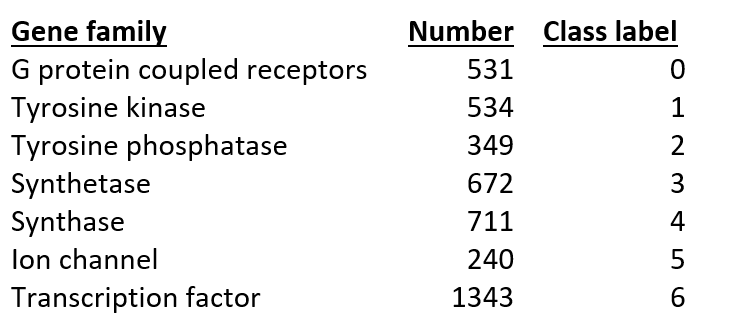

In [7]:
from IPython.display import Image
Image("Capture1.PNG

# Treating DNA Sequence as a "Language" ,otherwise Known as K-Mer Counting

**In bioinformatics, k-mers are substrings of length k contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C).**

k-mers are simply length k subsequences. For example, if we use "words" of length 6 (hexamers), “ATGCATGCA” sequence becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.


**After converting DNA into string of words called k-mers,the CountVectorizer tool provided by the scikit-learn  library in Python will be used to create a matrix of token counts  that we shall feed into the classifier**



## We defined a function to collect all possible overlapping k-mers of a specified length from any sequence string.

In [8]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

### Now we  converted our training data sequences into short overlapping k-mers of legth 6. We did that for each species of data we had using our getKmers function.

In [9]:
human["words"]=human.apply(lambda x: getKmers(x["sequence"]),axis=1)
human.head()
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

In [10]:
human=human.drop("sequence",axis=1)
#human["words"][0]
human.head()


,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [11]:
#human["words"][2]


### Since we  used scikit-learn natural language processing tools to do the k-mer counting, we had to convert the lists of k-mers for each gene into string sentences of words that the count vectorizer could use. We  also made a y variable to hold the class labels.

In [12]:
human_texts=list(human["words"])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_h = human.iloc[:, 0].values  

In [13]:
human_texts[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [14]:
y_h

array([4, 4, 3, ..., 6, 6, 6])

In [15]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 0].values       

## We used sklearn's "Natural Language" Processing tools to convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer.

**Feature extraction is the process of taking out a list of words from the text data and then transforming them into a feature set which is usable by a classifier. countVectorizer was used for feature extraction.**

In [16]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

## For human we had 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts.

In [17]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### If we have a look at class balance we can see we have  relatively balanced datasets.

<AxesSubplot:>

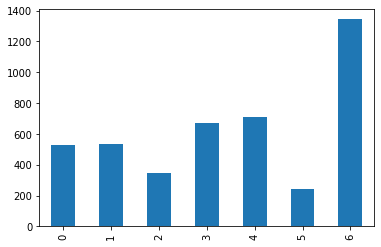

In [18]:
human["class"].value_counts().sort_index().plot.bar()

<AxesSubplot:>

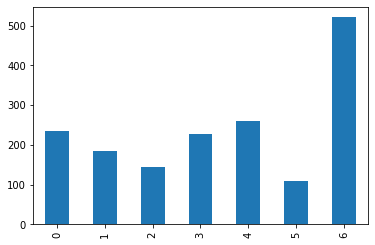

In [19]:
chimp['class'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

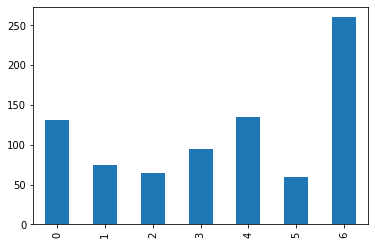

In [20]:
dog['class'].value_counts().sort_index().plot.bar()

#### So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

#### Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can really challenge the model's generalizability by trying to predict sequence function in other species (the chimpanzee and dog).

#### So below we will - 1: train/test spit. 2: Build simple multinomial naive Bayes classifier and 3: test the model performance.

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_h,test_size=0.2,random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


In [23]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

### Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [24]:
y_pred = classifier.predict(x_test)

### We did some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We got really good results on our unseen data, so it looks like our model did not overfit to the training data.

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### Make predictions for the Chimp and dog sequences¶

In [26]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

### Now, let's examine the typical performace metrics for each species.

In [27]:
# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [28]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


**The model seems to perform well on human data. It also does on Chimpanzee. The performance on dog is not quite as good. We would expect this since the dog is more divergent from human than the chimpanze.¶**